[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 0
Accuracy: 100.0 %


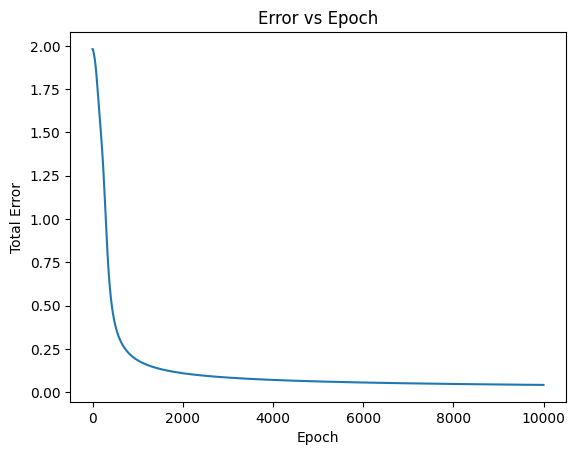

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
np.random.seed(42)
w1 = np.random.randn(2,3)  # 3 hidden neurons
b1 = np.zeros((1,3))
w2 = np.random.randn(3,1)
b2 = np.zeros((1,1))

lr = 1.0
epochs = 10000
errors = []

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for _ in range(epochs):
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)

    error = y - a2
    total_error = np.sum(np.abs(error))
    errors.append(total_error)

    d2 = error * sigmoid_derivative(a2)
    d1 = d2.dot(w2.T) * sigmoid_derivative(a1)

    w2 += a1.T.dot(d2) * lr
    b2 += np.sum(d2, axis=0, keepdims=True) * lr
    w1 += X.T.dot(d1) * lr
    b1 += np.sum(d1, axis=0, keepdims=True) * lr

# Predictions
cnt = 0
for i in range(len(X)):
    hidden = sigmoid(np.dot(X[i], w1) + b1)
    output = sigmoid(np.dot(hidden, w2) + b2)
    pred = 1 if output >= 0.5 else 0
    print(X[i], "->", pred)
    if pred == y[i]:
        cnt += 1
print("Accuracy:", cnt/len(X)*100, "%")

# Error vs Epoch
plt.plot(errors)
plt.title("Error vs Epoch")
plt.xlabel("Epoch"); plt.ylabel("Total Error")
plt.show()
